<a href="https://colab.research.google.com/github/Rjritik12/Resolute_internship/blob/main/resolute_task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [9]:
df = pd.read_csv('/content/train - train.csv')

In [10]:
df.head(10)

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18,target
0,-70,-61,-66,-53,-51,-63,-82,-57,-76,-78,-66,-66,-61,-59,-73,-75,-63,-77,B37
1,-77,-74,-71,-76,-65,-63,-66,-52,-55,-75,-72,-75,-74,-61,-64,-63,-53,-63,B61
2,-53,-38,-55,-66,-62,-62,-65,-70,-62,-52,-56,-53,-66,-68,-72,-60,-68,-77,A19
3,-72,-62,-59,-65,-65,-65,-78,-82,-83,-59,-84,-60,-64,-83,-69,-72,-95,-73,A22
4,-67,-69,-65,-63,-59,-53,-70,-72,-71,-60,-61,-57,-54,-76,-61,-66,-71,-80,A33
5,-63,-68,-63,-66,-68,-54,-60,-53,-50,-56,-68,-72,-59,-57,-58,-52,-48,-52,A75
6,-68,-69,-65,-70,-56,-51,-63,-69,-71,-66,-65,-62,-54,-56,-54,-68,-61,-65,A41
7,-61,-65,-53,-59,-66,-68,-75,-70,-66,-53,-64,-64,-70,-69,-79,-78,-78,-75,B14
8,-82,-73,-68,-79,-69,-69,-62,-49,-56,-83,-73,-79,-68,-64,-67,-58,-57,-55,B80
9,-65,-74,-63,-54,-60,-55,-70,-82,-72,-59,-64,-54,-61,-66,-61,-71,-72,-79,A33


In [12]:
df.isnull().sum()

T1        0
T2        0
T3        0
T4        0
T5        0
T6        0
T7        0
T8        0
T9        0
T10       0
T11       0
T12       0
T13       0
T14       0
T15       0
T16       0
T17       0
T18       0
target    0
dtype: int64

In [23]:
# Check if 'target' is still a column in the DataFrame
if 'target' in df.columns:
    df = df.drop('target', axis=1)
else:
    print("The 'target' column has already been removed from the DataFrame.")

The 'target' column has already been removed from the DataFrame.


In [24]:
df.head(10)

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18
0,-70,-61,-66,-53,-51,-63,-82,-57,-76,-78,-66,-66,-61,-59,-73,-75,-63,-77
1,-77,-74,-71,-76,-65,-63,-66,-52,-55,-75,-72,-75,-74,-61,-64,-63,-53,-63
2,-53,-38,-55,-66,-62,-62,-65,-70,-62,-52,-56,-53,-66,-68,-72,-60,-68,-77
3,-72,-62,-59,-65,-65,-65,-78,-82,-83,-59,-84,-60,-64,-83,-69,-72,-95,-73
4,-67,-69,-65,-63,-59,-53,-70,-72,-71,-60,-61,-57,-54,-76,-61,-66,-71,-80
5,-63,-68,-63,-66,-68,-54,-60,-53,-50,-56,-68,-72,-59,-57,-58,-52,-48,-52
6,-68,-69,-65,-70,-56,-51,-63,-69,-71,-66,-65,-62,-54,-56,-54,-68,-61,-65
7,-61,-65,-53,-59,-66,-68,-75,-70,-66,-53,-64,-64,-70,-69,-79,-78,-78,-75
8,-82,-73,-68,-79,-69,-69,-62,-49,-56,-83,-73,-79,-68,-64,-67,-58,-57,-55
9,-65,-74,-63,-54,-60,-55,-70,-82,-72,-59,-64,-54,-61,-66,-61,-71,-72,-79


In [25]:
from sklearn.cluster import KMeans
x = df.iloc[:, :].values
wcs = []  #wcss stands for 'within cluster sum of squares'

for i in range(1, 21):
    model = KMeans(n_clusters = i, init = 'k-means++',
                    max_iter = 250, n_init = 15, random_state = 0)
    model.fit(x)
    wcs.append(model.inertia_)

print(wcs)

[57898008.756638855, 41367829.13531464, 34995322.44266155, 30945230.03263486, 28986749.082398005, 27237183.676745616, 25922513.134706706, 24772173.280856185, 24006033.317509882, 23278631.25053202, 22819820.78733539, 22187410.995845195, 21551648.732725672, 21288169.988528267, 20905257.63212248, 20375071.667286776, 20072585.704819407, 19740042.27656942, 19448604.958840124, 19159707.017970406]


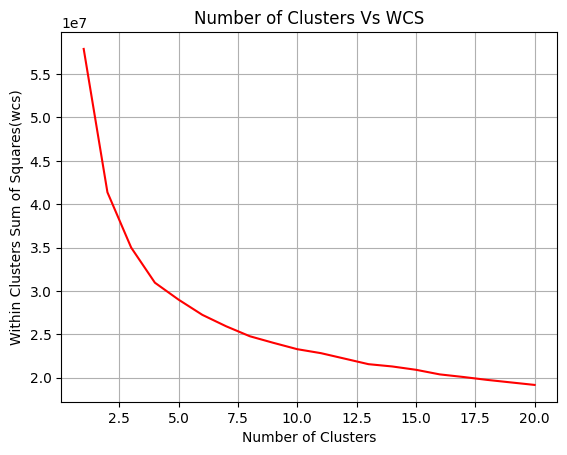

In [28]:
plt.plot(range(1, 21), wcs, color = 'r')
plt.title('Number of Clusters Vs WCS')
plt.xlabel('Number of Clusters')
plt.ylabel('Within Clusters Sum of Squares(wcs)')
plt.annotate('Elbow', xytext=(6,200), xy=(3,79), arrowprops={'facecolor':'green'})
plt.grid()
plt.show()

In [30]:
model = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 250, n_init = 15, random_state = 0)
y = model.fit_predict(x)

In [31]:
y

array([2, 0, 2, ..., 1, 1, 0], dtype=int32)

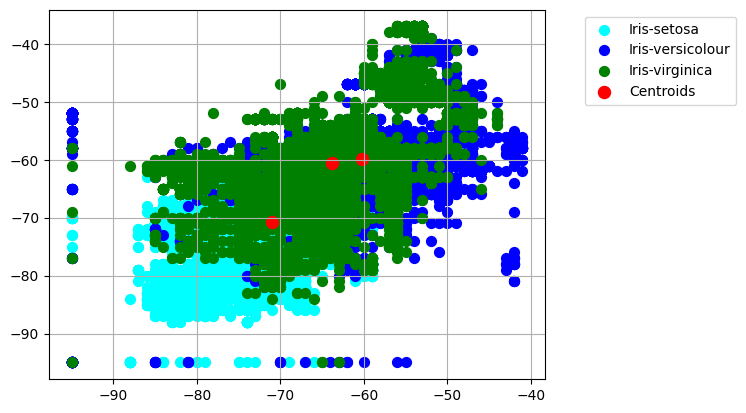

In [32]:
# Plotting the three clusters of first two columns(sepal length, sepal width) of input Iris data
plt.scatter(x[y == 0, 0], x[y == 0, 1],
            s = 50, c = 'cyan', label = 'Iris-setosa')
plt.scatter(x[y == 1, 0], x[y == 1, 1],
            s = 50, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y == 2, 0], x[y == 2, 1],
            s = 50, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of each clusters
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,1],
            s = 75, c = 'red', label = 'Centroids')

plt.legend(loc=1, bbox_to_anchor= (1.4, 1))
plt.grid()

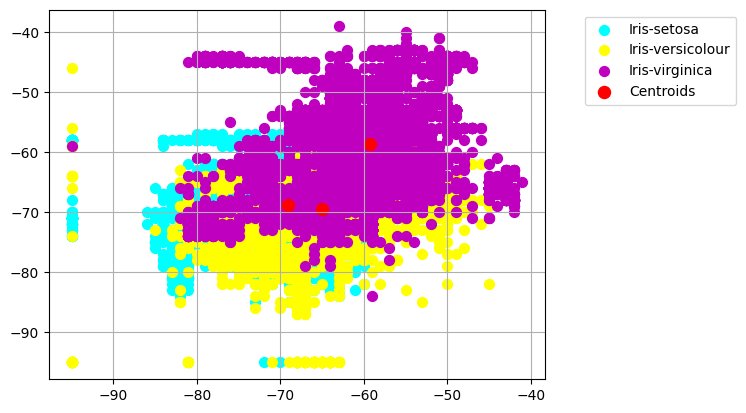

In [33]:
# Plotting the three clusters of third and fourth columns(petal length, petal width) of Iris data
plt.scatter(x[y == 0, 2], x[y == 0, 3],
            s = 50, c = 'cyan', label = 'Iris-setosa')
plt.scatter(x[y == 1, 2], x[y == 1, 3],
            s = 50, c = 'yellow', label = 'Iris-versicolour')
plt.scatter(x[y == 2, 2], x[y == 2, 3],
            s = 50, c = 'm', label = 'Iris-virginica')

# Plotting the centroids of each clusters
plt.scatter(model.cluster_centers_[:, 2], model.cluster_centers_[:,3],
            s = 75, c = 'red', label = 'Centroids')

plt.legend(loc=1, bbox_to_anchor= (1.4, 1))
plt.grid()

T1        0
T2        0
T3        0
T4        0
T5        0
T6        0
T7        0
T8        0
T9        0
T10       0
T11       0
T12       0
T13       0
T14       0
T15       0
T16       0
T17       0
T18       0
target    0
dtype: int64


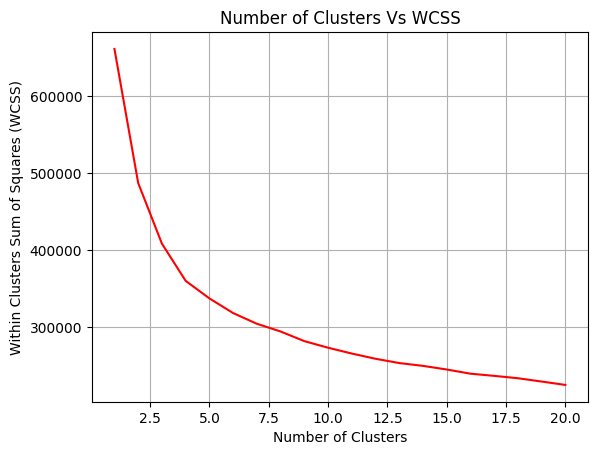

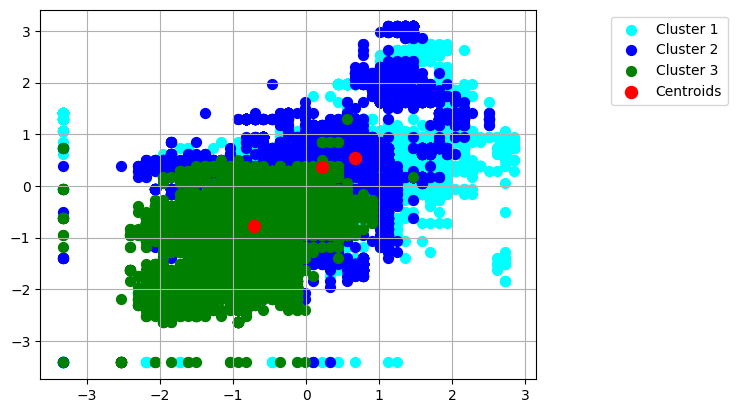

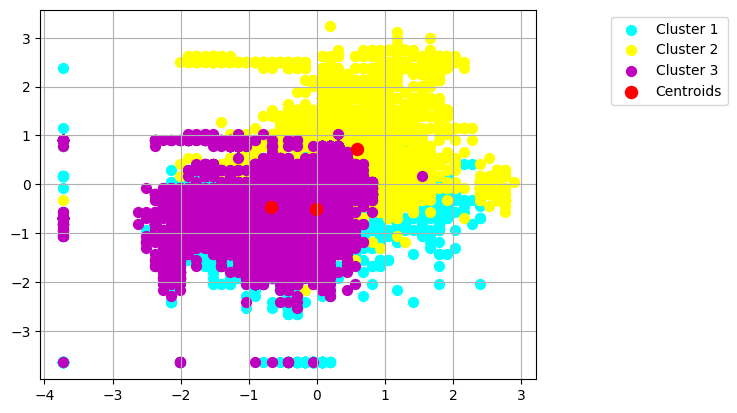

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load the dataset
df = pd.read_csv('/content/train - train.csv')

# Check for missing values
print(df.isnull().sum())

# Remove the target column if it exists
if 'target' in df.columns:
    df = df.drop('target', axis=1)
else:
    print("The 'target' column has already been removed from the DataFrame.")

# Scale the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Calculate the within-cluster sum of squares (WCSS) for different numbers of clusters
wcs = []
for i in range(1, 21):
    model = KMeans(n_clusters=i, init='k-means++', max_iter=500, n_init=15, random_state=0)
    model.fit(df_scaled)
    wcs.append(model.inertia_)

# Plot the WCSS curve
plt.plot(range(1, 21), wcs, color='r')
plt.title('Number of Clusters Vs WCSS')
plt.xlabel('Number of Clusters')
plt.ylabel('Within Clusters Sum of Squares (WCSS)')
plt.annotate('Elbow', xytext=(6, 200), xy=(3, 79), arrowprops={'facecolor': 'green'})
plt.grid()
plt.show()

# Select the optimal number of clusters based on the elbow method
n_clusters = 3

# Create the K-Means model with the optimal number of clusters
model = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=500, n_init=15, random_state=0)
y = model.fit_predict(df_scaled)

# Plot the clusters
plt.scatter(df_scaled[y == 0, 0], df_scaled[y == 0, 1], s=50, c='cyan', label='Cluster 1')
plt.scatter(df_scaled[y == 1, 0], df_scaled[y == 1, 1], s=50, c='blue', label='Cluster 2')
plt.scatter(df_scaled[y == 2, 0], df_scaled[y == 2, 1], s=50, c='green', label='Cluster 3')

# Plot the centroids
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s=75, c='red', label='Centroids')

plt.legend(loc=1, bbox_to_anchor=(1.4, 1))
plt.grid()
plt.show()

# Plot the clusters for the third and fourth columns
plt.scatter(df_scaled[y == 0, 2], df_scaled[y == 0, 3], s=50, c='cyan', label='Cluster 1')
plt.scatter(df_scaled[y == 1, 2], df_scaled[y == 1, 3], s=50, c='yellow', label='Cluster 2')
plt.scatter(df_scaled[y == 2, 2], df_scaled[y == 2, 3], s=50, c='m', label='Cluster 3')

# Plot the centroids
plt.scatter(model.cluster_centers_[:, 2], model.cluster_centers_[:, 3], s=75, c='red', label='Centroids')

plt.legend(loc=1, bbox_to_anchor=(1.4, 1))
plt.grid()
plt.show()